## Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import deque
import time
from heapq import *
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cityblock
from tqdm import tqdm
import seaborn as sns

# Part 1 : Environments and Algorithms

## Code to Generate and plot Maze

In [5]:
def generate_maze(dimension, prob, show_fig = False):
    maze = np.ones((dimension, dimension))
    for i in range(dimension):
        for j in range(dimension):
            if np.random.random() <= prob:
                maze[i,j] = 0
               
    maze[0,0] = 1
    maze[dimension-1, dimension-1] = 1
    
    if show_fig:
        fig, ax = plt.subplots(figsize=(10,6))
        plt.grid(True)
        sns.heatmap(maze, ax=ax, cmap=['black','white'], cbar=False)
        title = 'Dimensions:{} | P:{}'.format(dimension, prob)
        ax.set_title(title, fontsize=15)
        plt.savefig('maze.png')
        plt.show()
    return maze, prob

## Code to plot the Path and visited nodes in the Maze

In [6]:
def plot_search_maze(maze, algo, p):
    if 1 in maze:
        fig, ax = plt.subplots(figsize=(10,6))
        sns.heatmap(maze, ax=ax, cmap=["red","blue","black","white"], cbar=False)
        title = '{} | Dimension:{} | p:{}'.format(algo, maze.shape[0], p)
        ax.set_title(title, fontsize=15)
        plt.savefig(algo+'.png')
        plt.show()
        
       
    else:
        fig, ax = plt.subplots(figsize=(10,6))
        sns.heatmap(maze, ax=ax, cmap=["red","blue","black"], cbar=False)
        title = '{} | Dimension:{} | P:{}'.format(algo, maze.shape[0], p)
        ax.set_title(title, fontsize=15)
        plt.savefig(algo+'.png')
        plt.show()
        

## Extract Neighbors

In [7]:
def get_neighbors(maze, curr_node, visited):
    
    i,j = curr_node
    neighbors = []
    
    if j+1 < len(maze):
        right = (i,j+1)
        if (maze[right]) and right not in visited:
            neighbors.append(right)

    if i+1 < len(maze):
        bottom = (i+1,j)
        if (maze[bottom]) and bottom not in visited:
            neighbors.append(bottom)

    if i-1 >= 0:
        up = (i-1,j)
        if (maze[up]) and up not in visited:
            neighbors.append(up)
    
    if j-1 >= 0:
        left = (i,j-1)
        if (maze[left]) and left not in visited:
            neighbors.append(left)
           
    return neighbors      

## Depth First Search

In [8]:
def run_dfs(maze,p, show_fig = False):
    
    import time
    
    start = time.time()
    dfs_maze = maze.copy()
    stack = []
    visited = set()
    curr_node = None
    max_fringe = 1
    parent = {}
    source = (0,0)
    goal = (dfs_maze.shape[0]-1, dfs_maze.shape[1]-1)
    path = []
    
    stack.append(source)
    while len(stack):
        
        curr_node = stack[-1]
        if curr_node not in visited:
            visited.add(curr_node)
            dfs_maze[curr_node] = -1
        
        if curr_node == goal:
            
            time_taken = time.time() - start
            node = goal
            while node != source:
                path.insert(0,node)
                dfs_maze[node] = -2
                node = parent[node]
            path.insert(0,source)
            dfs_maze[source] = -2
                
            if show_fig:
                print('Path exists')    
                plot_search_maze(dfs_maze,'Depth First Search', p)
                
            return 1, visited, path, max_fringe, time_taken
        
        neighbors = get_neighbors(dfs_maze, curr_node, visited)
        
        if len(neighbors) == 0:
            stack.pop()
           
        else:
            stack.pop()
            for neighbor in reversed(neighbors):
                if neighbor not in parent:
                    parent[neighbor] = curr_node
                    stack.append(neighbor)
            
        if max_fringe < len(stack):
            max_fringe = len(stack)
    
    if show_fig:
        print('Path does not exist')
    time_taken = time.time() - start
    return 0, visited, [], max_fringe, time_taken
    
    
    

## Breadth First Search

In [9]:
def run_bfs(maze,p, show_fig=False):
    start = time.time()
    bfs_maze = maze.copy()
    queue = deque([])
    path = []
    visited = set()
    parent = {}
    curr_node = None
    max_fringe = 1
    source = (0,0)
    goal = (bfs_maze.shape[0]-1, bfs_maze.shape[1]-1)
    
    queue.append(source)
    
    while len(queue):
        
        curr_node = queue.popleft()
        if curr_node not in visited:
            visited.add(curr_node)
            bfs_maze[curr_node] = -1
        
        if curr_node == goal:
        
            time_taken = time.time() - start
            node = goal
            while node != source:
                path.insert(0,node)
                bfs_maze[node] = -2
                node = parent[node]
            path.insert(0,source)
            bfs_maze[source] = -2
            
            if show_fig:
                print('Path exists')  
                plot_search_maze(bfs_maze, 'Breadth First Search', p)
            
            return 1, visited, path, max_fringe, time_taken
        
        neighbors = get_neighbors(bfs_maze, curr_node, visited)
        for neighbor in neighbors:
            if neighbor not in parent:
                parent[neighbor] = curr_node
                queue.append(neighbor)
           
        if max_fringe < len(queue):
            max_fringe = len(queue)
            
    if show_fig:
        print('Path does not exist')
    time_taken = time.time() - start
    return 0, visited, [], max_fringe, time_taken

## A-Star

In [10]:
def euclidean_heuristic(dimension):
    H = np.zeros((dimension, dimension))
    goal = (dimension-1, dimension-1)
    for i in range(dimension):
        for j in range(dimension):
            H[i,j] = euclidean((i,j), goal)
           
    return H

def manhattan_heuristic(dimension):
    H = np.zeros((dimension, dimension))
    goal = (dimension-1, dimension-1)
    for i in range(dimension):
        for j in range(dimension):
            H[i,j] = cityblock((i,j), goal)
           
    return H

def run_A_star(maze, heuristic, p, show_fig=False):
    start = time.time()
    A_star_maze = maze.copy()
    queue = []
    path = []
    visited = set()
    parent = {}
    curr_node = None
    max_fringe = 1
    source = (0,0)
    goal = (A_star_maze.shape[0]-1, A_star_maze.shape[1]-1)
    
    if heuristic == 'euclidean':
        H = euclidean_heuristic(maze.shape[0])
       
    else:
        H = manhattan_heuristic(maze.shape[0])
        
    
    heappush(queue, (H[source],0, source))
    
    while len(queue):
        
        total_cost, cost_to_source, curr_node = heappop(queue)
        if curr_node not in visited:
            visited.add(curr_node)
            A_star_maze[curr_node] = -1
        
        if curr_node == goal:

            time_taken = time.time() - start
            node = goal
            while node != source:
                path.insert(0,node)
                A_star_maze[node] = -2
                node = parent[node]
            path.insert(0,source)
            A_star_maze[source] = -2
            
            if show_fig:
                print('Path exists')
                plot_search_maze(A_star_maze, 'A-star '+heuristic, p)
                
            return 1, visited, path, max_fringe, time_taken
        
        neighbors = get_neighbors(A_star_maze, curr_node, visited)
        if len(neighbors):
            cost_to_source += 1
            for neighbor in neighbors:
                if neighbor not in parent:
                    parent[neighbor] = curr_node
                    heappush(queue, (H[neighbor]+cost_to_source, cost_to_source, neighbor))
           
        if max_fringe < len(queue):
            max_fringe = len(queue)
            
    if show_fig:
        print('Path does not exist')
    time_taken = time.time() - start
    return 0, visited, [], max_fringe, time_taken

## Driver to plot Maze

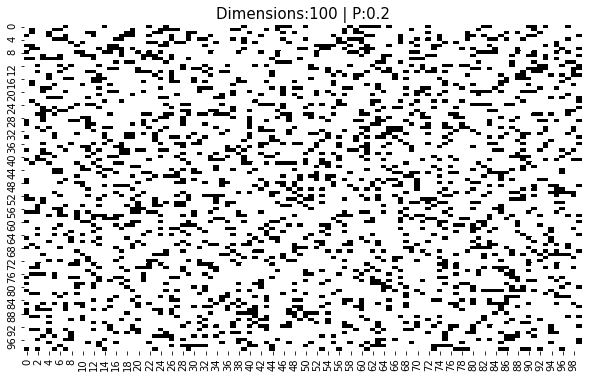

In [7]:
maze, prob = generate_maze(100,0.2,show_fig=True)

## Run DFS

Path exists


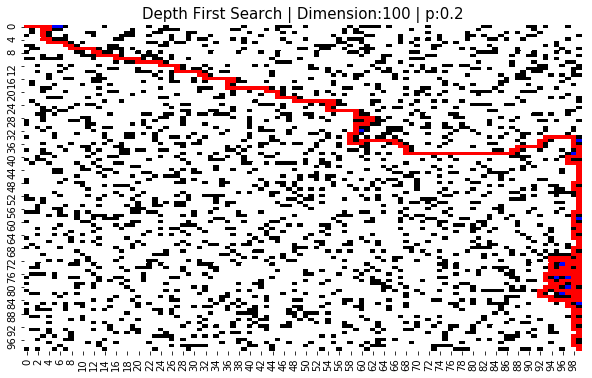

303

In [13]:
dfs = run_dfs(maze,prob, show_fig=True)
len(dfs[2])

## Run BFS

Path exists


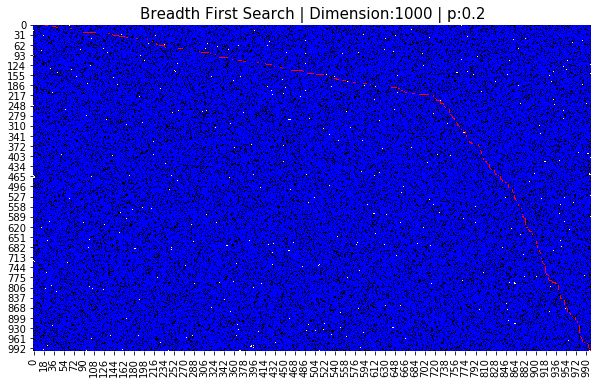

1999

In [35]:
bfs = run_bfs(maze,prob,show_fig=True)
len(bfs[2])

## Run Euclidean A-Star

Path exists


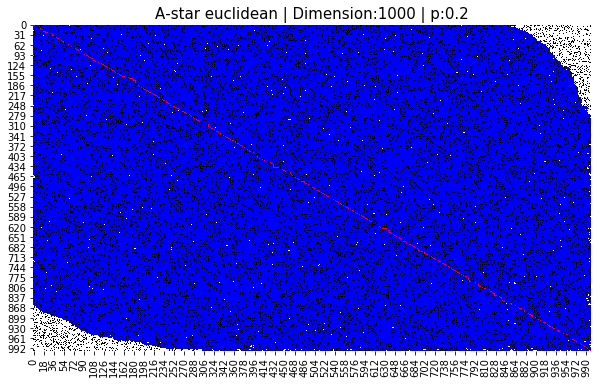

1999

In [36]:
A_star = run_A_star(maze, 'euclidean',prob,show_fig=True)
len(A_star[2])

## Run Manhattan A-star

Path exists


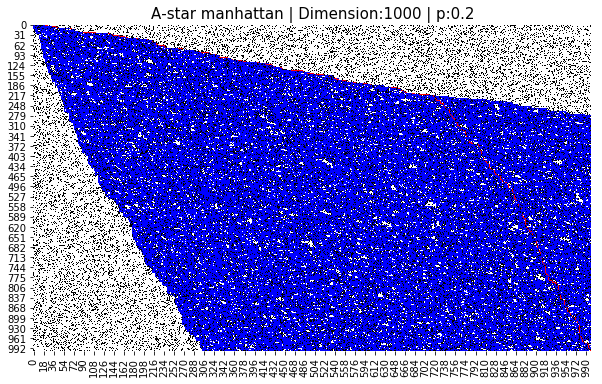

1999

In [37]:
A_star = run_A_star(maze, 'manhattan', prob, show_fig=True)
len(A_star[2])

# Part 2 : Analysis and Comparisons

### 2.  For p ≈ 0.2, generate a solvable map, and show the paths returned for each algorithm. Do the results make sense? ASCII printouts are fine, but good visualizations are a bonus

#### Generate maze

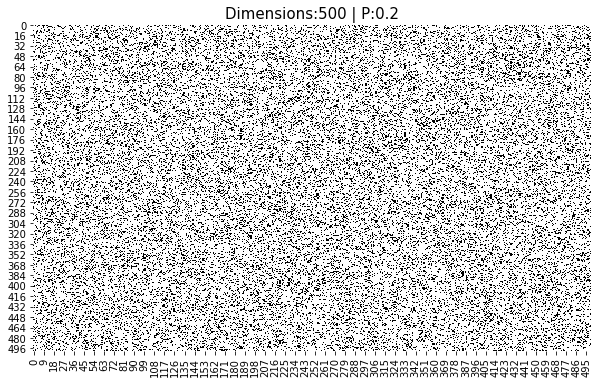

In [52]:
maze, prob = generate_maze(500, 0.2, show_fig=True)

### DFS

Path exists


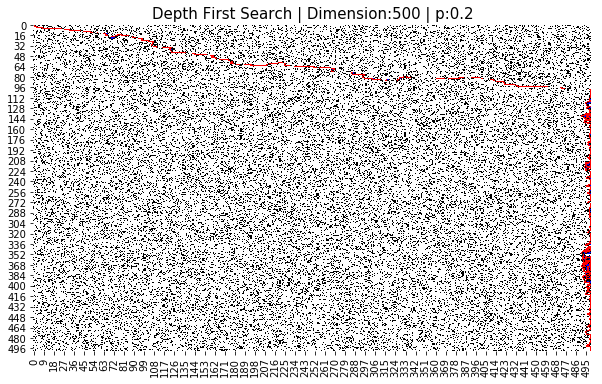

In [53]:
dfs = run_dfs(maze,0.2, True)

### BFS

Path exists


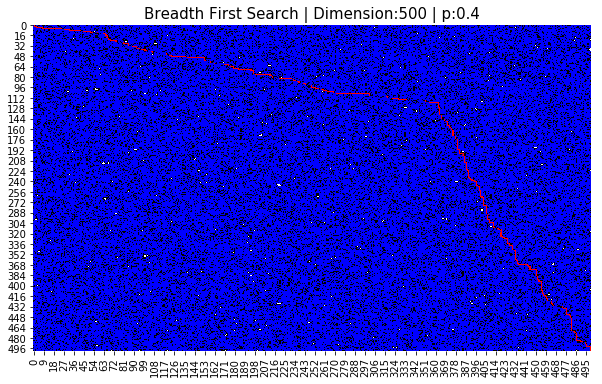

999

In [54]:
bfs = run_bfs(maze,0.4, True)
len(bfs[2])

#### A* Euclidean

Path exists


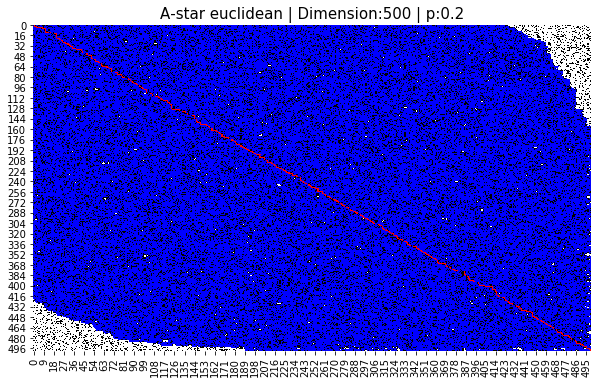

In [55]:
A_star = run_A_star(maze,'euclidean', 0.2,show_fig=True)

#### A* Manhattan

Path exists


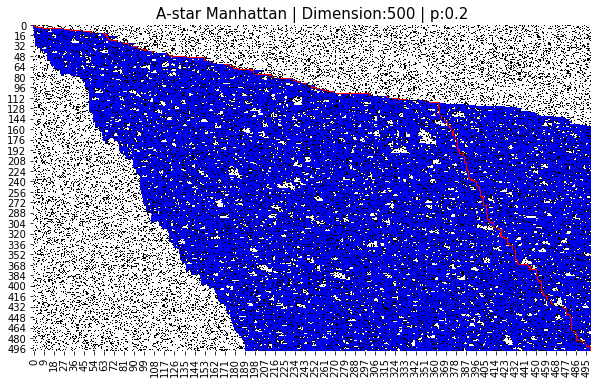

In [56]:
A_star = run_A_star(maze,'Manhattan', 0.2,show_fig=True)

### 3. • Given dim, how does maze-solvability depend on p? For a range of p values, estimate the probability that a maze will be solvable by generating multiple mazes and checking them for solvability. What is the best algorithm to use here? Plot density vs solvability, and try to identify as accurately as you can the threshold p0 where for p < p0, most mazes are solvable, but p > p0, most mazes are not solvable. 

In [17]:
solve_count = {}
for p in [0.1, 0.2, 0.3, 0.4, 0.5]:
    solved = 0
    for i in tqdm(range(500)):
        maze, p = generate_maze(500,p)
        dfs = run_dfs(maze,p)
        solved += dfs[0]
    solve_count[p] = solved   
    

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [02:09<00:00,  3.87it/s]


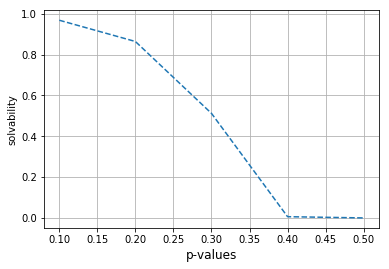

In [41]:
probs = []
p = []
for k,v in solve_count.items():
    p.append(k)
    probs.append(v/500)
probs

plt.plot(p, probs, linestyle='--')
plt.xlabel('p-values', fontsize=12)
plt.ylabel('solvability')
plt.grid(True)
plt.savefig('solvability.png')
    

### 4. • For p in [0, p0] as above, estimate the average or expected length of the shortest path from start to goal. You may discard unsolvable maps. Plot density vs expected shortest path length. What algorithm is most useful here?


#### DFS

In [57]:
avg_length = {}
for p in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35]:
    length = []
    solved = 0

    for i in tqdm(range(100)):
        
        
        maze, p = generate_maze(500, p)
        dfs = run_dfs(maze, p)
        if dfs[0]:
            length.append(len(dfs[2]))
            solved += 1
    avg = sum(length) / solved
    avg_length[p] = avg

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:33<00:00,  3.01it/s]


In [58]:
avg_length

{0.1: 1218.3469387755101,
 0.15: 1411.1684210526316,
 0.2: 1650.9512195121952,
 0.25: 1947.0,
 0.3: 2323.9811320754716,
 0.35: 2913.8275862068967}

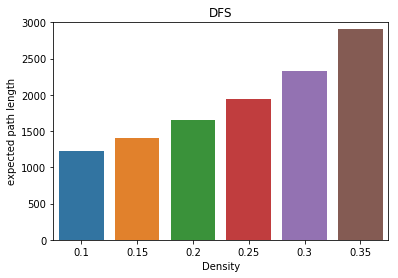

In [59]:
p = list(avg_length.keys())
path_length = list(avg_length.values())
fig, ax = plt.subplots()
sns.barplot(p,path_length,ax=ax)
ax.set(xlabel='Density', ylabel='expected path length', title = 'DFS')
plt.ylim((0,3000))
plt.savefig('dfs_avg_len')


### BFS

In [60]:
avg_length = {}
for p in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35]:
    length = []
    solved = 0

    for i in tqdm(range(50)):
        
        
        maze, p = generate_maze(500, p)
        bfs = run_bfs(maze, p)
        if bfs[0]:
            length.append(len(bfs[2]))
            solved += 1
    avg = sum(length) / solved
    avg_length[p] = avg

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:18<00:00,  2.14it/s]


In [61]:
avg_length

{0.1: 999.0,
 0.15: 999.0,
 0.2: 999.0,
 0.25: 999.2051282051282,
 0.3: 1004.6,
 0.35: 1061.0}

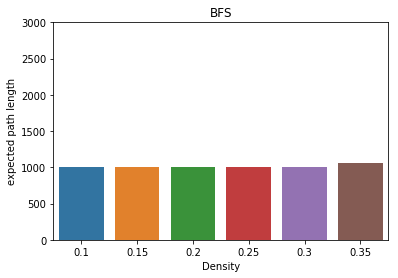

In [62]:
p = list(avg_length.keys())
path_length = list(avg_length.values())
fig, ax = plt.subplots()
sns.barplot(p,path_length,ax=ax)
ax.set(xlabel='Density', ylabel='expected path length', title = 'BFS')
plt.ylim((0,3000))
plt.savefig('bfs_avg_len')


### Euclidean A-star

In [63]:
avg_length = {}
for p in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35]:
    length = []
    solved = 0

    for i in tqdm(range(10)):
        
        
        maze, p = generate_maze(500, p)
        A_star = run_A_star(maze,'euclidean', p)
        if A_star[0]:
            length.append(len(A_star[2]))
            solved += 1
    avg = sum(length) / solved
    avg_length[p] = avg

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:35<00:00,  3.56s/it]


In [64]:
avg_length

{0.1: 999.0,
 0.15: 999.0,
 0.2: 999.0,
 0.25: 1000.1428571428571,
 0.3: 1007.6666666666666,
 0.35: 1058.2}

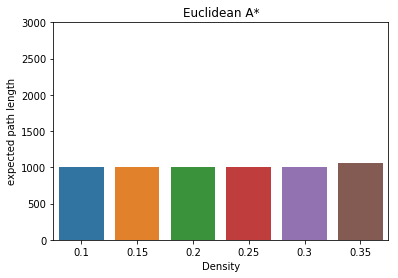

In [65]:
p = list(avg_length.keys())
path_length = list(avg_length.values())
fig, ax = plt.subplots()
sns.barplot(p,path_length,ax=ax)
ax.set(xlabel='Density', ylabel='expected path length', title = 'Euclidean A*')
plt.ylim((0,3000))
plt.savefig('A_euc_avg_len')

## Manhattan A-star

In [66]:
avg_length = {}
for p in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35]:
    length = []
    solved = 0

    for i in tqdm(range(10)):
        
        
        maze, p = generate_maze(500, p)
        A_star = run_A_star(maze,'manhattan', p)
        if A_star[0]:
            length.append(len(A_star[2]))
            solved += 1
    avg = sum(length) / solved
    avg_length[p] = avg

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:25<00:00,  2.39s/it]


In [67]:
avg_length

{0.1: 999.0,
 0.15: 999.0,
 0.2: 999.0,
 0.25: 999.0,
 0.3: 1001.6666666666666,
 0.35: 1052.0}

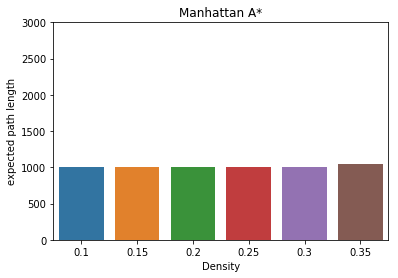

In [68]:
p = list(avg_length.keys())
path_length = list(avg_length.values())
fig, ax = plt.subplots()
sns.barplot(p,path_length,ax=ax)
ax.set(xlabel='Density', ylabel='expected path length', title = 'Manhattan A*')
plt.ylim((0,3000))
plt.savefig('A_man_avg_len')

## 5. Is one heuristic uniformly better than the other for running A∗? How can they be compared? Plot the relevant data and justify your conclusions

In [32]:
euc_nodes_explore = {}
for p in [0.1, 0.15, 0.2, 0.25, 0.30, 0.35]:
    explored = []
    for i in tqdm(range(10)):
        maze, p = generate_maze(500, p)
        A_star = run_A_star(maze,'euclidean', p)
        explored.append(len(A_star[1]))
        
    avg_explored = np.average(explored)
    euc_nodes_explore[p] = avg_explored
        

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:30<00:00,  3.17s/it]


In [33]:
euc_nodes_explore

{0.1: 223144.4,
 0.15: 208640.0,
 0.2: 193112.2,
 0.25: 156119.8,
 0.3: 122578.7,
 0.35: 40353.1}

In [34]:
man_nodes_explore = {}
for p in [0.1, 0.15, 0.2, 0.25, 0.30, 0.35]:
    explored = []
    for i in tqdm(range(10)):
        maze, p = generate_maze(500, p)
        A_star = run_A_star(maze,'manhattan', p)
        explored.append(len(A_star[1]))
        
    avg_explored = np.average(explored)
    man_nodes_explore[p] = avg_explored
        

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:22<00:00,  2.25s/it]


In [35]:
man_nodes_explore

{0.1: 192106.4,
 0.15: 161282.4,
 0.2: 143586.8,
 0.25: 61117.6,
 0.3: 24090.9,
 0.35: 37131.9}

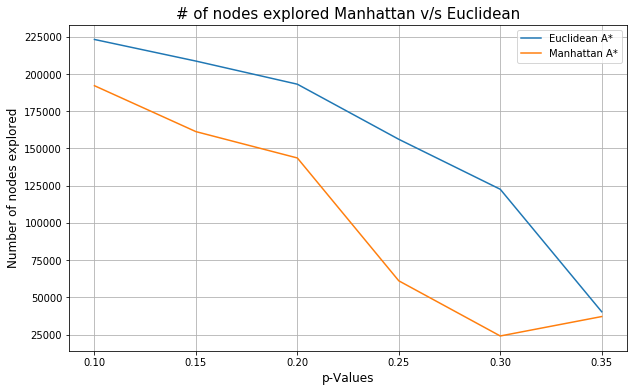

In [36]:
p = list(euc_nodes_explore.keys())
euc_explored = list(euc_nodes_explore.values())
man_explored = list(man_nodes_explore.values())

plt.figure(figsize=(10,6))
plt.plot(p, euc_explored, label='Euclidean A*')
plt.plot(p, man_explored, label='Manhattan A*')
plt.xlabel('p-Values', fontsize=12)
plt.ylabel('Number of nodes explored', fontsize=12)
plt.title('# of nodes explored Manhattan v/s Euclidean', fontsize=15)
plt.grid()
plt.legend(loc='best')
plt.savefig('nodes_explore_man_euc')
plt.show()

## 6. • Is BFS will generate an optimal shortest path in this case - is it always better than DFS? How can they be compared? Plot the relevant data and justify your conclusions.

In [27]:
dfs_nodes_explore = {}
for p in [0.1, 0.15, 0.2, 0.25, 0.30, 0.35]:
    explored = []
    for i in tqdm(range(10)):
        maze, p = generate_maze(500, p)
        dfs = run_dfs(maze, p)
        explored.append(len(dfs[1]))
        
    avg_explored = np.average(explored)
    dfs_nodes_explore[p] = avg_explored

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  5.71it/s]


In [28]:
dfs_nodes_explore

{0.1: 1092.5,
 0.15: 9470.5,
 0.2: 27453.1,
 0.25: 40553.0,
 0.3: 3524.4,
 0.35: 24889.7}

In [29]:
bfs_nodes_explore = {}
for p in [0.1, 0.15, 0.2, 0.25, 0.30, 0.35]:
    explored = []
    for i in tqdm(range(10)):
        maze, p = generate_maze(500, p)
        bfs = run_bfs(maze, p)
        explored.append(len(bfs[1]))
        
    avg_explored = np.average(explored)
    bfs_nodes_explore[p] = avg_explored

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.97it/s]


In [30]:
bfs_nodes_explore

{0.1: 224949.1,
 0.15: 212459.3,
 0.2: 159569.4,
 0.25: 167663.3,
 0.3: 103180.9,
 0.35: 76678.1}

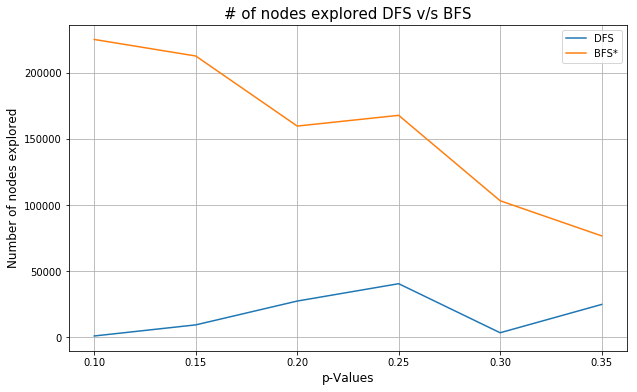

In [31]:
p = list(dfs_nodes_explore.keys())
dfs_explored = list(dfs_nodes_explore.values())
bfs_explored = list(bfs_nodes_explore.values())

plt.figure(figsize=(10,6))
plt.plot(p, dfs_explored, label='DFS')
plt.plot(p, bfs_explored, label='BFS*')
plt.xlabel('p-Values', fontsize=12)
plt.ylabel('Number of nodes explored', fontsize=12)
plt.title('# of nodes explored DFS v/s BFS', fontsize=15)
plt.grid()
plt.legend(loc='best')
plt.savefig('nodes_explore_dfs_bfs')
plt.show()

## 8. • For DFS, can you improve the performance of the algorithm by choosing what order to load the neighboring rooms into the fringe? What neighbors are ‘worth’ looking at before others? Be thorough and justify yourself.

In [46]:
def get_neighbors_dummy(maze, curr_node, visited):
    
    i,j = curr_node
    neighbors = []
    

    if i+1 < len(maze):
        bottom = (i+1,j)
        if (maze[bottom]) and bottom not in visited:
            neighbors.append(bottom)
            
    if j+1 < len(maze):
        right = (i,j+1)
        if (maze[right]) and right not in visited:
            neighbors.append(right)
            
        
    if j-1 >= 0:
        left = (i,j-1)
        if (maze[left]) and left not in visited:
            neighbors.append(left)
    
    if i-1 >= 0:
        up = (i-1,j)
        if (maze[up]) and up not in visited:
            neighbors.append(up)
    
    

    
           
    return neighbors      

In [38]:
def dummy_dfs(maze, p, show_fig=False):
    start = time.time()
    dfs_maze = maze.copy()
    stack = []
    visited = set()
    curr_node = None
    max_fringe = 1
    source = (0,0)
    goal = (dfs_maze.shape[0]-1, dfs_maze.shape[1]-1)
    
    stack.append(source)
    while len(stack):
        
        curr_node = stack[-1]
        if curr_node not in visited:
            visited.add(curr_node)
            dfs_maze[curr_node] = -1
        
        if curr_node == goal:
            
            time_taken = time.time() - start
            for node in stack:
                dfs_maze[node] = -2
                
            if show_fig:
                print('Path exists')    
                plot_search_maze(dfs_maze,'Depth First Search', p)
                
            return 1, visited, stack, max_fringe, time_taken
        
        neighbors = get_neighbors_dummy(dfs_maze, curr_node, visited)
        
        if len(neighbors) == 0:
            stack.pop()
           
        else:
            stack.append(neighbors[0])
            
        if max_fringe < len(stack):
            max_fringe = len(stack)
    
    if show_fig:
        print('Path does not exist')
    time_taken = time.time() - start
    return 0, visited, [], max_fringe, time_taken

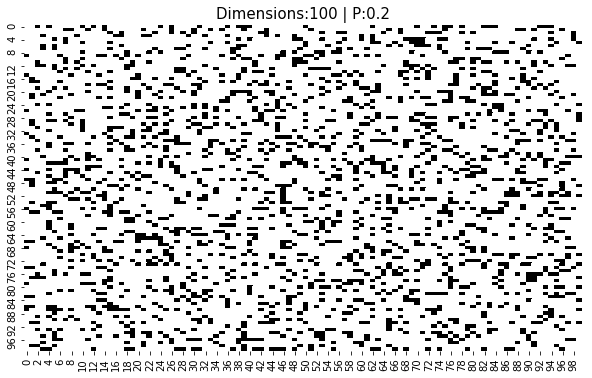

In [39]:
maze, p = generate_maze(100, 0.2, show_fig=True)

Path exists


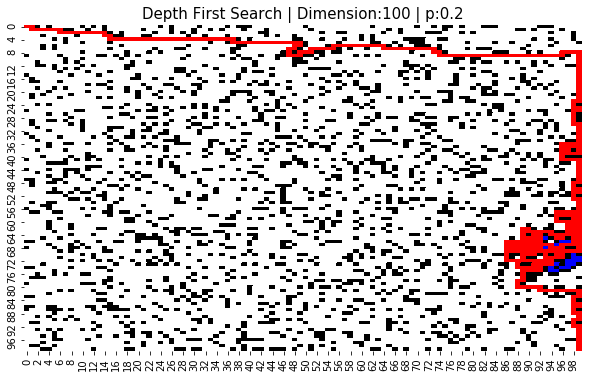

367


In [45]:
dfs = run_dfs(maze, p, True)
print(len(dfs[2]))

Path exists


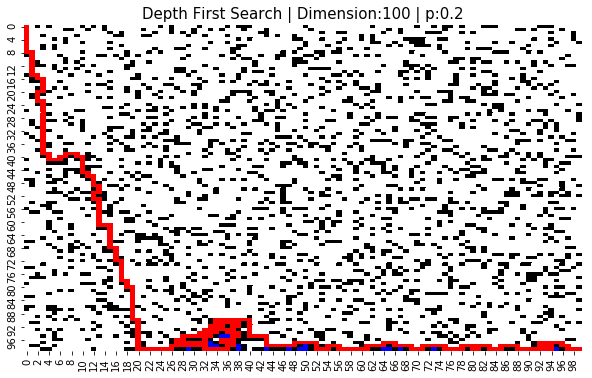

293


In [47]:
dfs_1 = dummy_dfs(maze, p, True)
print(len(dfs_1[2]))

## Generating Hard Mazes

### DFS maximal path length

In [11]:
def selection(dim, prob, top):
    
    length_list = []
    maze_list = []
    top_mazes = []
    
    for i in range(100):
        maze, prob = generate_maze(dim,prob)
        dfs = run_dfs(maze,prob)
        path_length = len(dfs[2])
        if path_length:
            length_list.append(path_length)
            maze_list.append(maze)
           
       
    indices_sorted = np.argsort(length_list)[::-1][:top]
    for i in indices_sorted:
        top_mazes.append(maze_list[i])
        
    
    return top_mazes

def cross_over(top_mazes, dim):
    
    cross_over_mazes = []
    i = 0
    j = len(top_mazes) - 1
    while i < len(top_mazes):
        cross_maze = np.zeros((dim,dim))
        cross_maze[0:dim//2][:] = top_mazes[i][0:dim//2][:]
        cross_maze[dim//2:dim][:] = top_mazes[j][dim//2:dim][:]
        cross_over_mazes.append(cross_maze)
        i += 1
        j -= 1
       
    return cross_over_mazes

def mutate(cross_over_mazes, dim, prob):
    hard_mazes = []
    lengths = []
    for maze in cross_over_mazes:
        for i in range(25):
            maze[np.random.randint(1,dim-1)][np.random.randint(1,dim-1)] = 0
            
        dfs = run_dfs(maze,prob) 
        path_length = len(dfs[2])
        if path_length:
            lengths.append(path_length)
            hard_mazes.append(maze)
        
    return hard_mazes, lengths  

In [12]:
top_mazes = selection(100,0.35, 10)
for i in range(100):
    cross_over_mazes = cross_over(top_mazes, 100)
    hard_mazes, lengths = mutate(cross_over_mazes, 100, 0.35)
len(hard_mazes)
max_length = max(lengths)
idx = lengths.index(max_length)
hardest_maze = hard_mazes[idx]
print(max_length)

607


Path exists


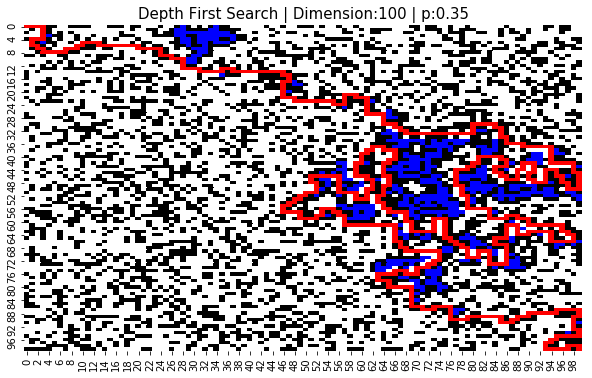

607

In [13]:
dfs = run_dfs(hardest_maze,0.35, True)
len(dfs[2])

## DFS max fringe

In [14]:
def selection(dim, prob, top):
    
    fringe_size_list = []
    maze_list = []
    top_mazes = []
    
    for i in range(100):
        maze, prob = generate_maze(dim,prob)
        dfs = run_dfs(maze,prob)
        fringe_size = dfs[3]
        if dfs[0]:
            fringe_size_list.append(fringe_size)
            maze_list.append(maze)
           
       
    indices_sorted = np.argsort(fringe_size_list)[::-1][:top]
    for i in indices_sorted:
        top_mazes.append(maze_list[i])
        
    
    return top_mazes

def cross_over(top_mazes, dim):
    
    cross_over_mazes = []
    i = 0
    j = len(top_mazes) - 1
    while i < len(top_mazes):
        cross_maze = np.zeros((dim,dim))
        cross_maze[0:dim//2][:] = top_mazes[i][0:dim//2][:]
        cross_maze[dim//2:dim][:] = top_mazes[j][dim//2:dim][:]
        cross_over_mazes.append(cross_maze)
        i += 1
        j -= 1
       
    return cross_over_mazes

def mutate(cross_over_mazes, dim, prob):
    hard_mazes = []
    fringe_sizes = []
    for maze in cross_over_mazes:
        for i in range(25):
            maze[np.random.randint(1,dim-1)][np.random.randint(1,dim-1)] = 0
            
        dfs = run_dfs(maze,prob) 
        fringe_size = dfs[3]
        if dfs[0]:
            fringe_sizes.append(fringe_size)
            hard_mazes.append(maze)
        
    return hard_mazes, fringe_sizes  



In [15]:
top_mazes = selection(100,0.35, 10)
for i in range(100):
    cross_over_mazes = cross_over(top_mazes, 100)
    hard_mazes, fringe_sizes = mutate(cross_over_mazes, 100, 0.35)

max_fringe_size = max(fringe_sizes)
idx = fringe_sizes.index(max_fringe_size)
hardest_maze = hard_mazes[idx]
print(max_fringe_size)

810


Path exists


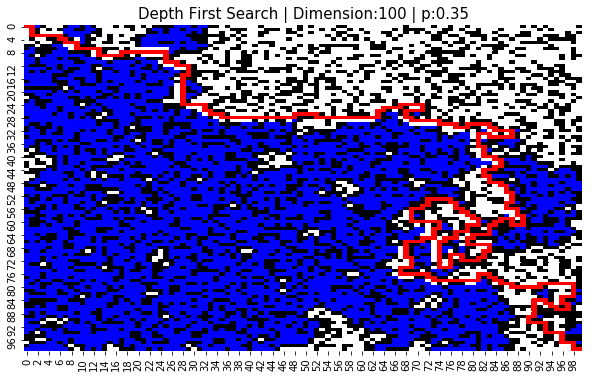

810
401


In [16]:
dfs = run_dfs(hardest_maze,0.35, True)
print(dfs[3])
print(len(dfs[2]))

## A_star with max nodes expanded

In [17]:
def selection(dim, prob, top):
    
    visited_list = []
    maze_list = []
    top_mazes = []
    
    for i in range(100):
        maze, prob = generate_maze(dim,prob)
        A_star = run_A_star(maze,'Manhattan',prob)
        visited_size = len(A_star[1])
        if A_star[0]:
            visited_list.append(visited_size)
            maze_list.append(maze)
           
       
    indices_sorted = np.argsort(visited_list)[::-1][:top]
    for i in indices_sorted:
        top_mazes.append(maze_list[i])
        
    
    return top_mazes

def cross_over(top_mazes, dim):
    
    cross_over_mazes = []
    i = 0
    j = len(top_mazes) - 1
    while i < len(top_mazes):
        cross_maze = np.zeros((dim,dim))
        cross_maze[0:dim//2][:] = top_mazes[i][0:dim//2][:]
        cross_maze[dim//2:dim][:] = top_mazes[j][dim//2:dim][:]
        cross_over_mazes.append(cross_maze)
        i += 1
        j -= 1
       
    return cross_over_mazes

def mutate(cross_over_mazes, dim, prob):
    hard_mazes = []
    visited_sizes = []
    for maze in cross_over_mazes:
        for i in range(25):
            maze[np.random.randint(1,dim-1)][np.random.randint(1,dim-1)] = 0
            
        A_star = run_A_star(maze,'Manhattan',prob) 
        visited_size = len(A_star[1])
        if A_star[0]:
            visited_sizes.append(visited_size)
            hard_mazes.append(maze)
        
    return hard_mazes, visited_sizes  

        


In [18]:
top_mazes = selection(100,0.35, 10)
for i in range(100):
    cross_over_mazes = cross_over(top_mazes, 100)
    hard_mazes, visited_sizes = mutate(cross_over_mazes, 100, 0.35)

max_visit_size = max(visited_sizes)
idx = visited_sizes.index(max_visit_size)
hardest_maze = hard_mazes[idx]
print(max_visit_size)

4405


Path exists


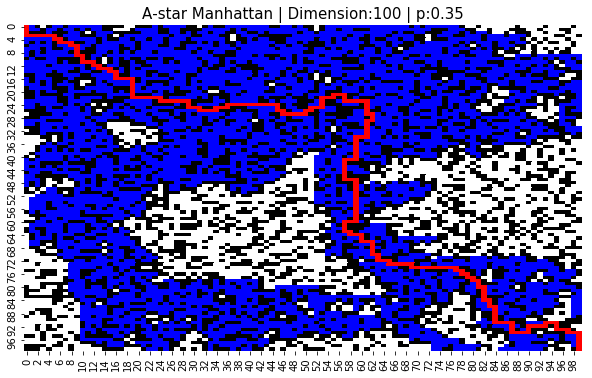

4405

In [19]:
A_star = run_A_star(hardest_maze,'Manhattan', 0.35,True)
len(A_star[1])

## A_star with max_fringe

In [20]:
def selection(dim, prob, top):
    
    fringe_size_list = []
    maze_list = []
    top_mazes = []
    
    for i in range(100):
        maze, prob = generate_maze(dim,prob)
        A_star = run_A_star(maze,'Manhattan',prob)
        fringe_size = A_star[3]
        if A_star[0]:
            fringe_size_list.append(fringe_size)
            maze_list.append(maze)
           
       
    indices_sorted = np.argsort(fringe_size_list)[::-1][:top]
    for i in indices_sorted:
        top_mazes.append(maze_list[i])
        
    
    return top_mazes

def cross_over(top_mazes, dim):
    
    cross_over_mazes = []
    i = 0
    j = len(top_mazes) - 1
    while i < len(top_mazes):
        cross_maze = np.zeros((dim,dim))
        cross_maze[0:dim//2][:] = top_mazes[i][0:dim//2][:]
        cross_maze[dim//2:dim][:] = top_mazes[j][dim//2:dim][:]
        cross_over_mazes.append(cross_maze)
        i += 1
        j -= 1
       
    return cross_over_mazes

def mutate(cross_over_mazes, dim, prob):
    hard_mazes = []
    fringe_sizes = []
    for maze in cross_over_mazes:
        for i in range(25):
            maze[np.random.randint(1,dim-1)][np.random.randint(1,dim-1)] = 0
            
        A_star = run_A_star(maze,'Manhattan',prob) 
        fringe_size = A_star[3]
        if A_star[0]:
            fringe_sizes.append(fringe_size)
            hard_mazes.append(maze)
        
    return hard_mazes, fringe_sizes  

In [21]:
top_mazes = selection(100,0.35, 10)
for i in range(100):
    cross_over_mazes = cross_over(top_mazes, 100)
    hard_mazes, fringe_sizes = mutate(cross_over_mazes, 100, 0.35)

max_fringe_size = max(fringe_sizes)
idx = fringe_sizes.index(max_fringe_size)
hardest_maze = hard_mazes[idx]
print(max_fringe_size)

257


Path exists


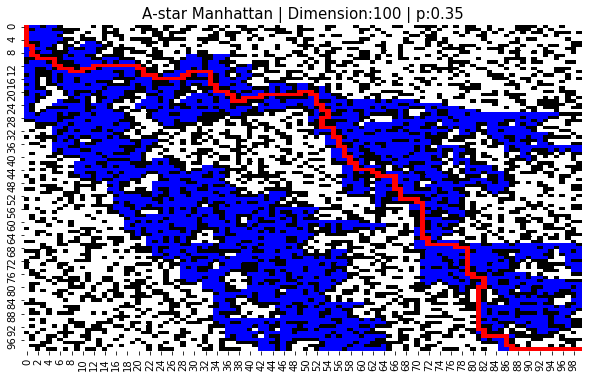

257

In [22]:
A_star = run_A_star(hardest_maze, 'Manhattan', 0.35, True)
A_star[3]